In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import g3py as g3
import pymc3 as pm
import theano as th
import theano.tensor as tt

g3.style_big_seaborn()
g3.style_widget()

/opt/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Samples DataSets

In [2]:
x, y = g3.data_sunspots()
y /= y.max()
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.1, plot=False)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

Total: 309 | Obs: 30 (9.70873786407767%)


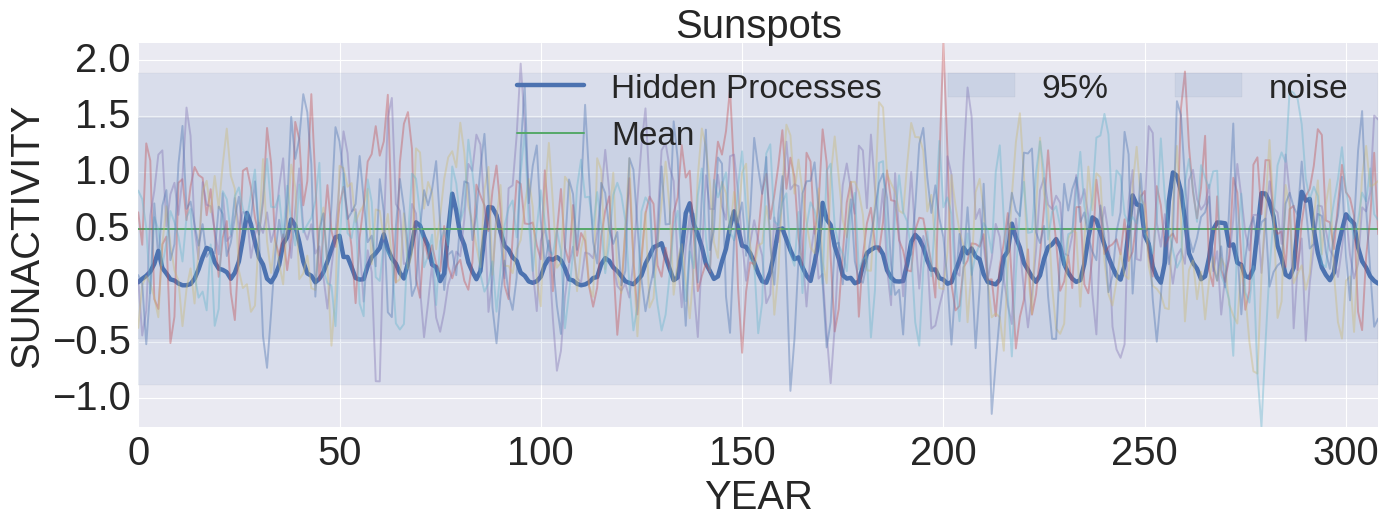

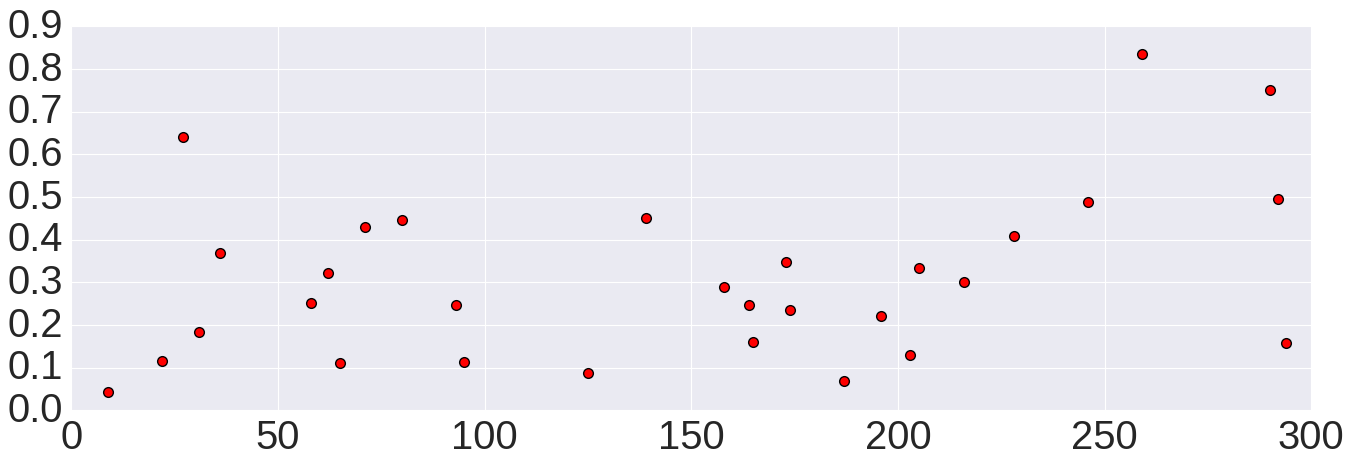

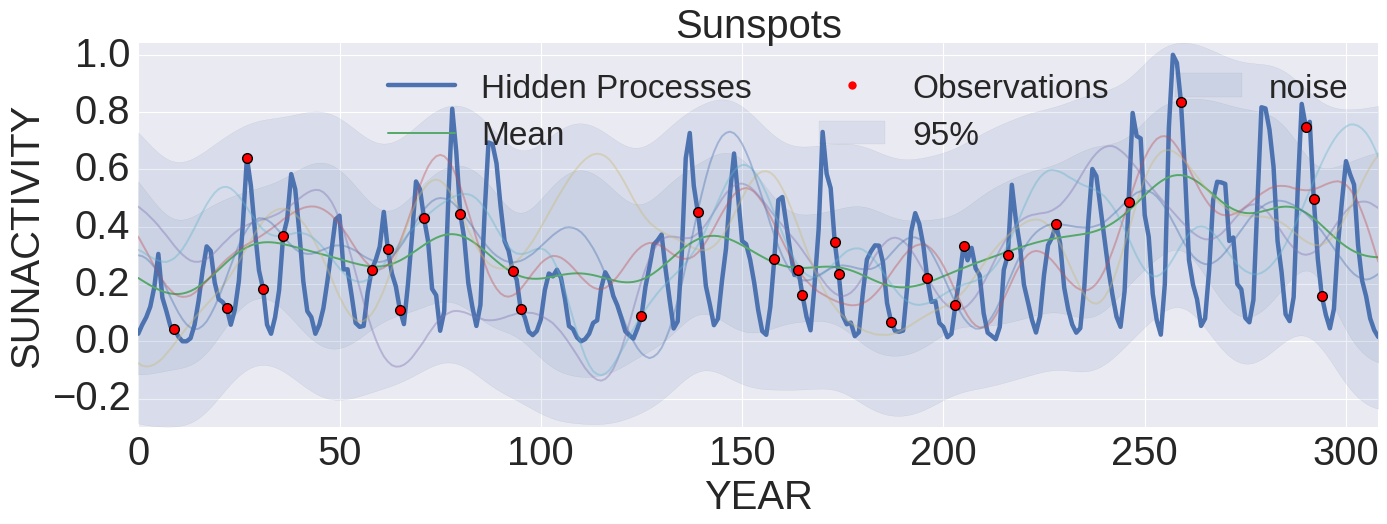

CPU times: user 41.6 s, sys: 15.3 s, total: 56.9 s
Wall time: 18 s


In [5]:
%%time
#gm = g3.GraphicalModel(name='Bayes', description='Holi', file='bayes.pkl', reset=True)
gp = g3.TGP(space=x, hidden=y, location=g3.Bias(), kernel=g3.SE(), mapping=g3.BoxCoxShifted(), noise=True)
gp.describe('Sunspots','YEAR','SUNACTIVITY')
gp.plot(samples=5), g3.show()
gp.observed(inputs=x_obs, outputs=y_obs)
gp.plot_observations(), g3.show()
gp.plot(samples=5)
g3.plot_save('images/gp_sunspots0.pdf'), g3.show()

gp, gp.active, gp.active.model, gp.active.model.vars, gp.compiles, gp.params, gp.logp(gp.params), gp.scores(gp.params, logp=False)

{'TGP_SE_rate_log_': array([-3.90854502], dtype=float32), 'TGP_BoxShift_shift': 0.5517444, 'TGP_Bias_Bias': 0.17514907, 'TGP_BoxShift_power_log_': 0.0, 'TGP_Noise_var_log_': 0.0884737, 'TGP_SE_var_log_': 1.6061428} 
 -38.033935546875 {'BiasL1': 0.18084821, 'BiasL2': 0.052229501}


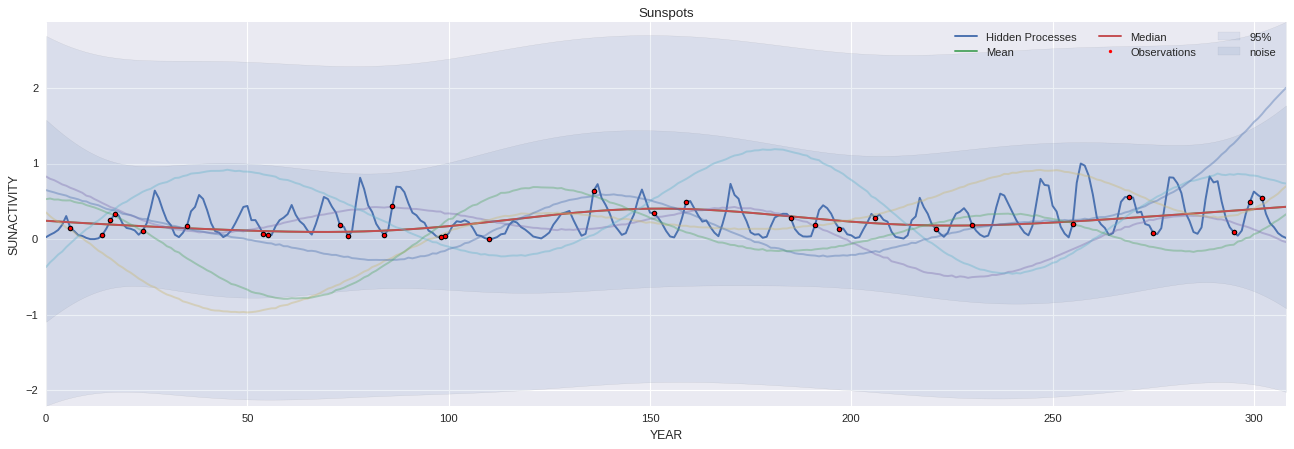

{'TGP_SE_rate_log_': array([-3.22459841], dtype=float32), 'TGP_BoxShift_shift': 1.0036888, 'TGP_Bias_Bias': 0.19002567, 'TGP_BoxShift_power_log_': 0.0, 'TGP_Noise_var_log_': 0.86071521, 'TGP_SE_var_log_': -4.7730312} 
 -40.7404670715332 {'BiasL1': 0.16774602, 'BiasL2': 0.050578177}


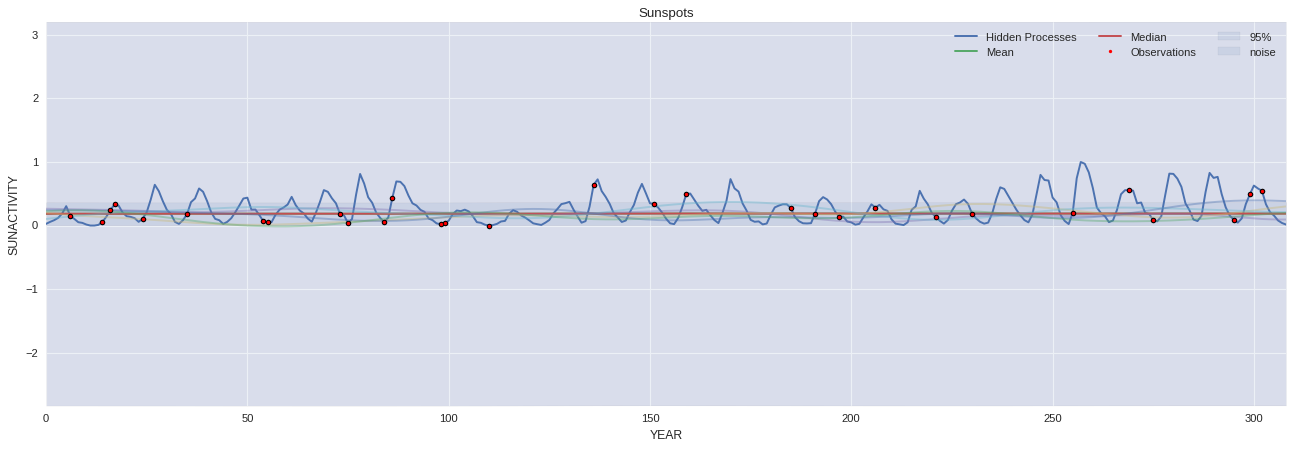

{'TGP_SE_rate_log_': array([-1.72155917], dtype=float32), 'TGP_BoxShift_shift': 1.6873009, 'TGP_Bias_Bias': 0.4277589, 'TGP_BoxShift_power_log_': 0.0, 'TGP_Noise_var_log_': -5.5906625, 'TGP_SE_var_log_': -7.9095206} 
 -841.6851806640625 {'BiasL1': 0.46773148, 'BiasL2': 0.26426405}


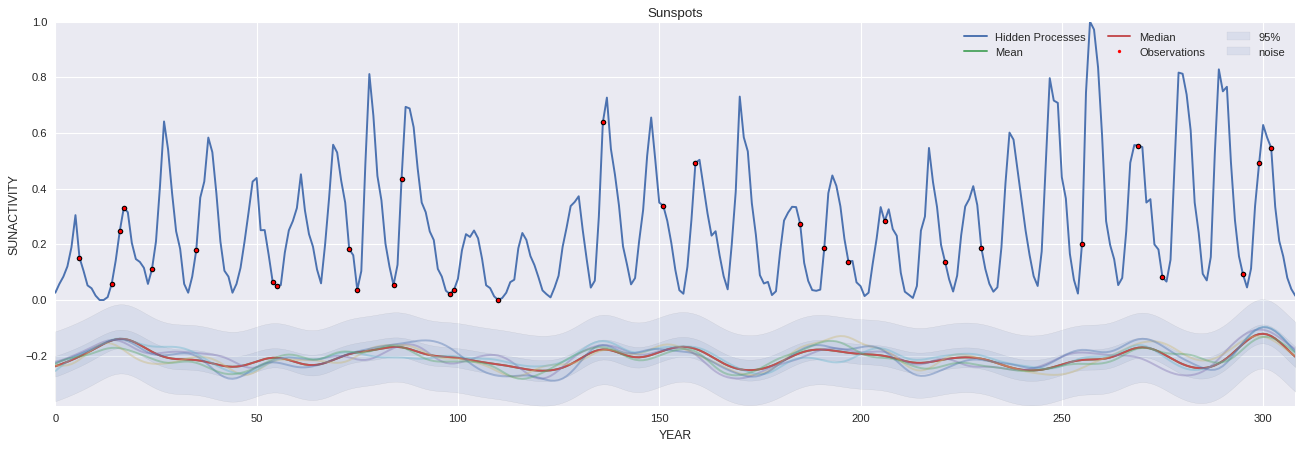

{'TGP_SE_rate_log_': array([-2.04027629], dtype=float32), 'TGP_BoxShift_shift': 1.5051932, 'TGP_Bias_Bias': 0.27501318, 'TGP_BoxShift_power_log_': 0.0, 'TGP_Noise_var_log_': -0.76789761, 'TGP_SE_var_log_': -2.4562442} 
 -23.95496368408203 {'BiasL1': 0.38475731, 'BiasL2': 0.19359858}


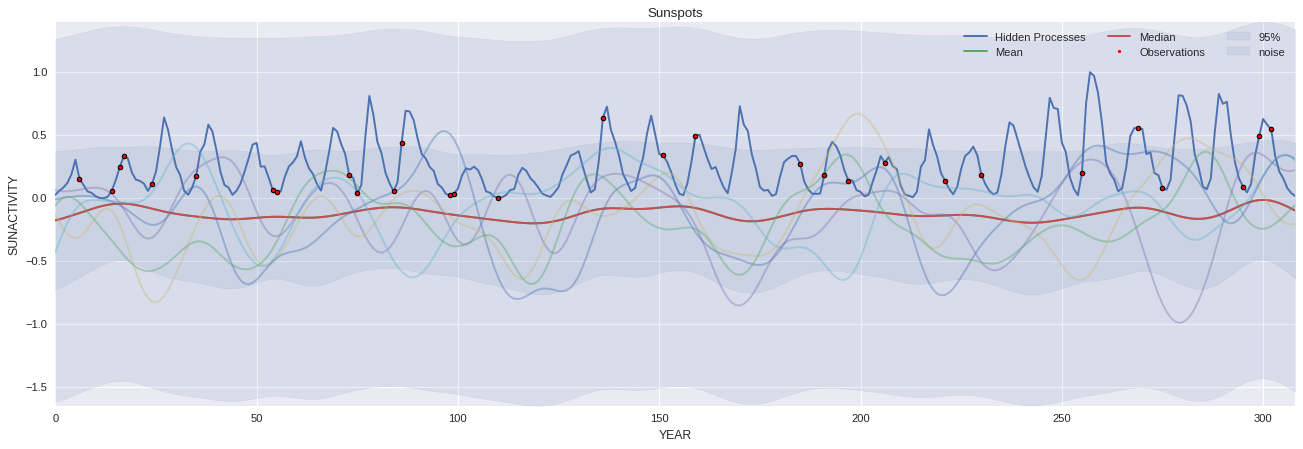

{'TGP_SE_rate_log_': array([-2.52298856], dtype=float32), 'TGP_BoxShift_shift': 2.7054746, 'TGP_Bias_Bias': -0.01163645, 'TGP_BoxShift_power_log_': -0.0, 'TGP_Noise_var_log_': -12.681292, 'TGP_SE_var_log_': -5.3743253} 
 -15765.0546875 {'BiasL1': 0.26364803, 'BiasL2': 0.14177221}


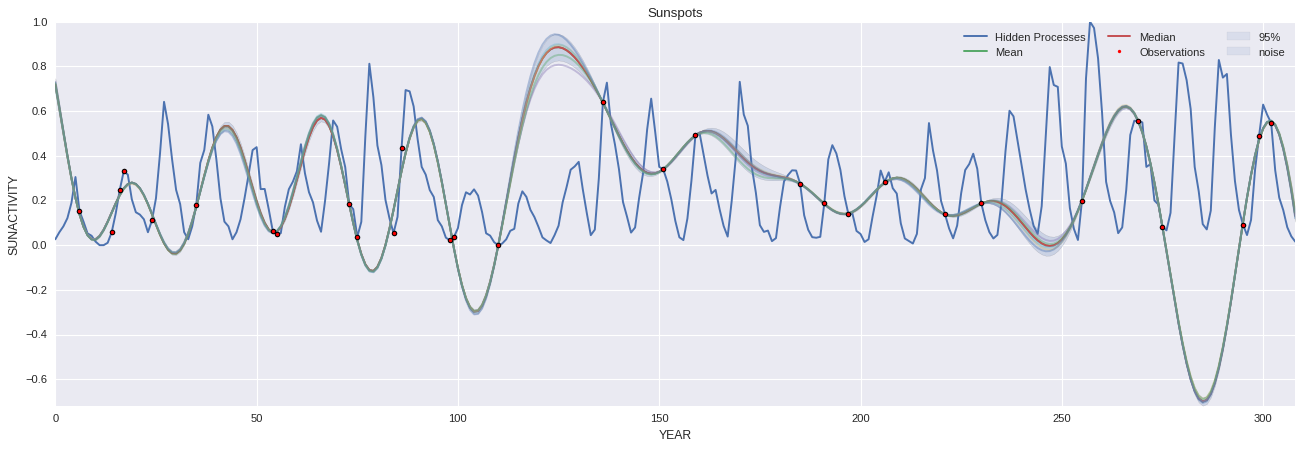

{'TGP_SE_rate_log_': array([-1.98255575], dtype=float32), 'TGP_BoxShift_shift': 1.2948561, 'TGP_Bias_Bias': -0.16361167, 'TGP_BoxShift_power_log_': 0.0, 'TGP_Noise_var_log_': -5.9917006, 'TGP_SE_var_log_': -3.3236883} 
 -98.83744049072266 {'BiasL1': 0.23047067, 'BiasL2': 0.10699932}


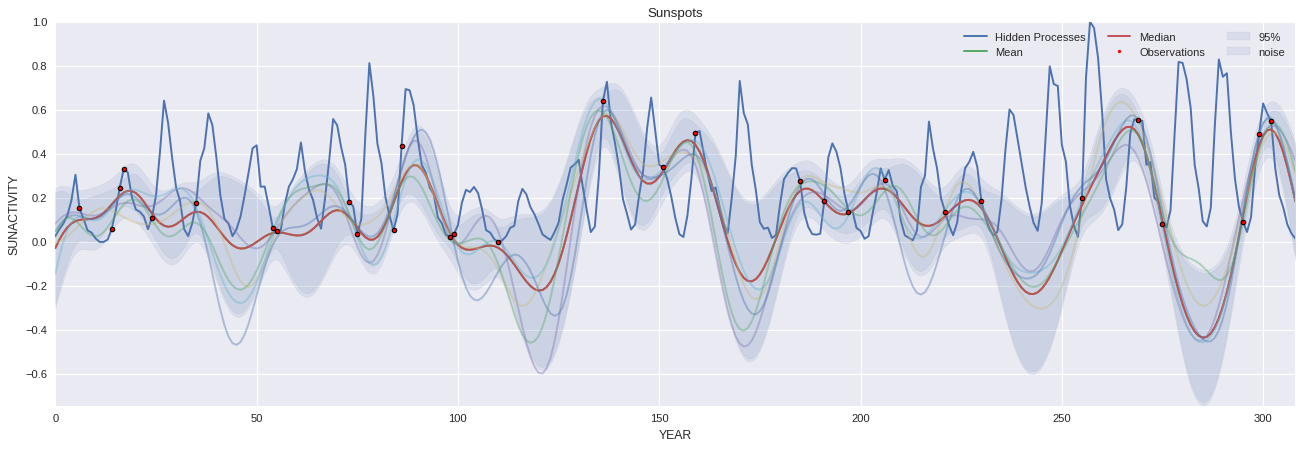

{'TGP_SE_rate_log_': array([ 1.29114771], dtype=float32), 'TGP_BoxShift_shift': 2.5817111, 'TGP_Bias_Bias': -0.070813149, 'TGP_BoxShift_power_log_': 0.0, 'TGP_Noise_var_log_': -4.1316733, 'TGP_SE_var_log_': -4.3689442} 
 -1822.2073974609375 {'BiasL1': 1.8337264, 'BiasL2': 3.4719279}


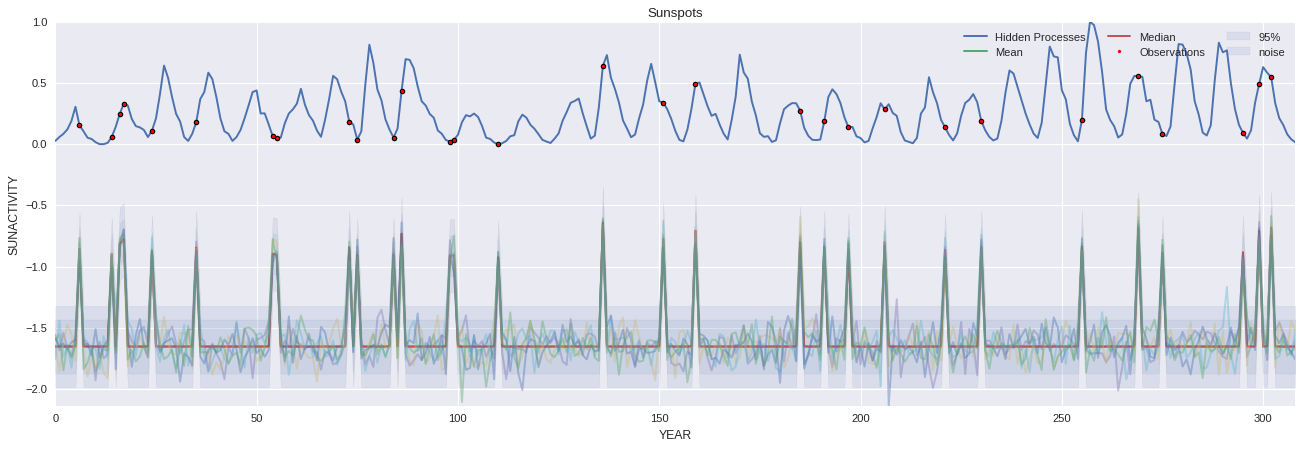

{'TGP_SE_rate_log_': array([-2.27822495], dtype=float32), 'TGP_BoxShift_shift': 3.1057942, 'TGP_Bias_Bias': -0.14535896, 'TGP_BoxShift_power_log_': 0.0, 'TGP_Noise_var_log_': -2.846334, 'TGP_SE_var_log_': 0.37494931} 
 -47.660072326660156 {'BiasL1': 0.28827512, 'BiasL2': 0.16719918}


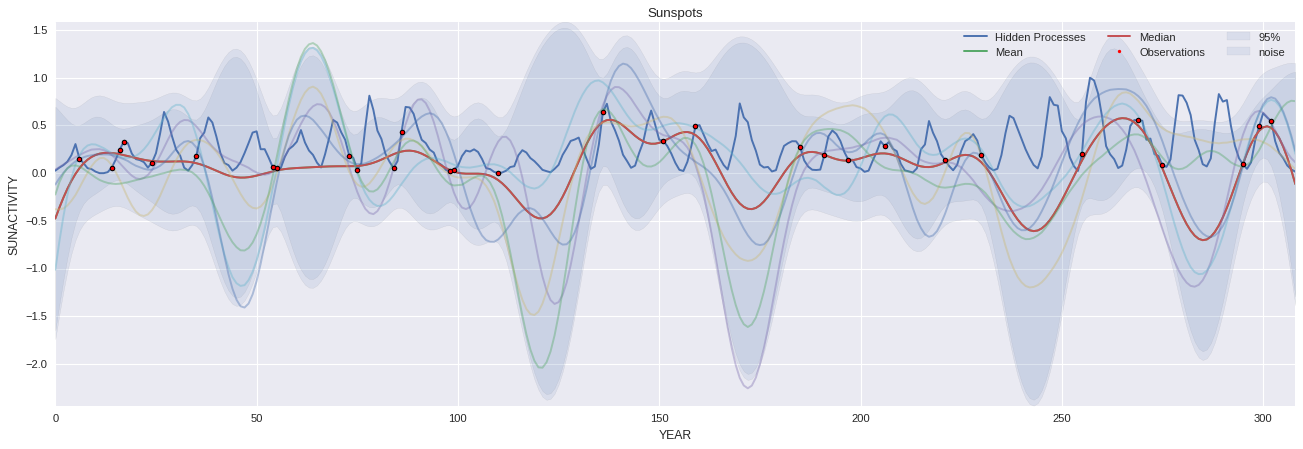

{'TGP_SE_rate_log_': array([-2.21467304], dtype=float32), 'TGP_BoxShift_shift': 0.47403994, 'TGP_Bias_Bias': 0.32727686, 'TGP_BoxShift_power_log_': -0.0, 'TGP_Noise_var_log_': -9.0164347, 'TGP_SE_var_log_': 0.0069406996} 
 -34.282676696777344 {'BiasL1': 0.27766171, 'BiasL2': 0.16147201}


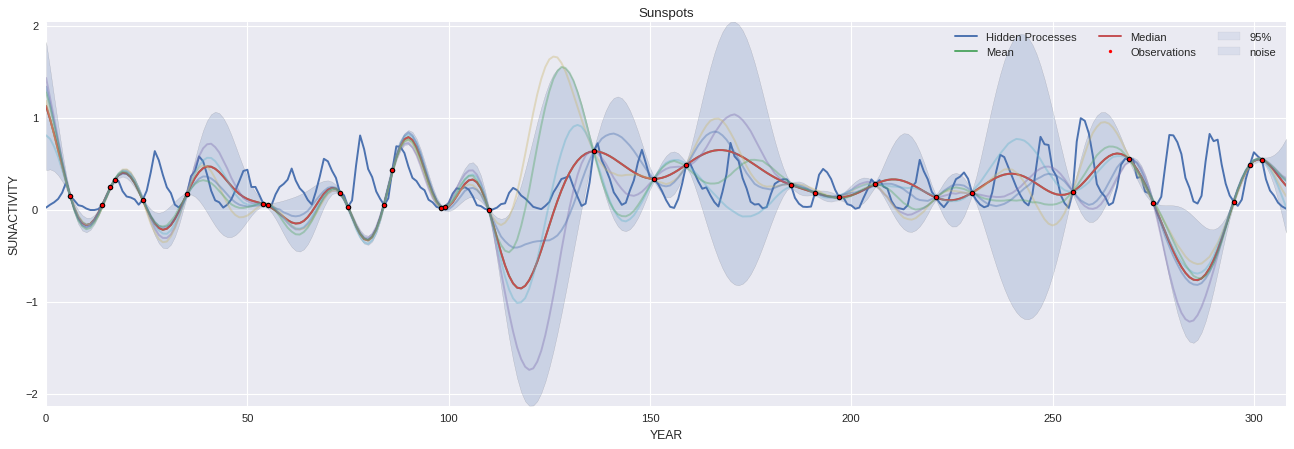

{'TGP_SE_rate_log_': array([-5.48895216], dtype=float32), 'TGP_BoxShift_shift': 1.2063968, 'TGP_Bias_Bias': -0.17042048, 'TGP_BoxShift_power_log_': 0.0, 'TGP_Noise_var_log_': -11.413868, 'TGP_SE_var_log_': -5.3782582} 
 -37298.3984375 {'BiasL1': 0.16560619, 'BiasL2': 0.044429041}


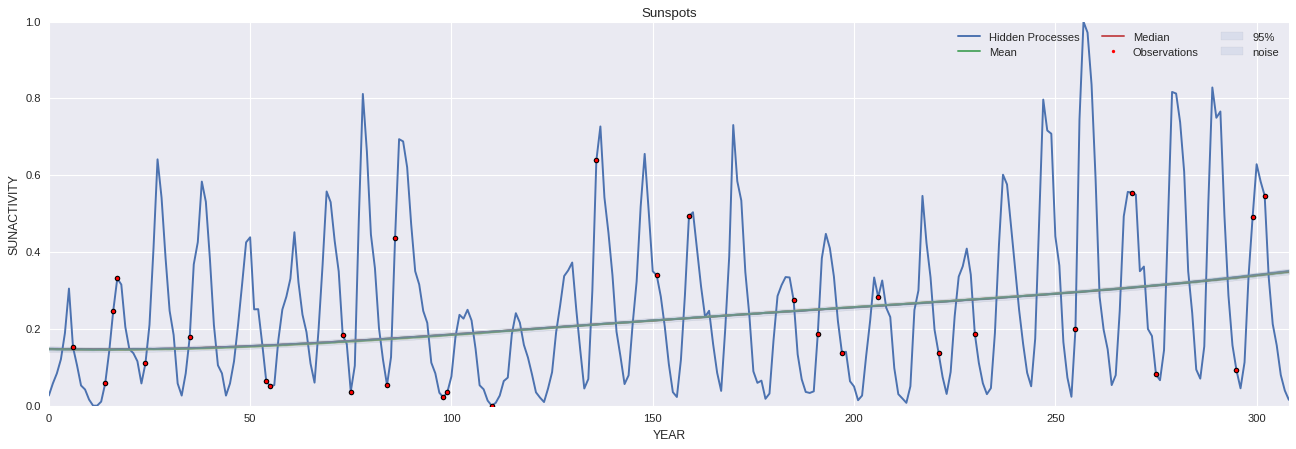

In [34]:
for k in range(10):
    params = gp.active.params_random(sigma=1)
    print(params,'\n' ,gp.logp(params), gp.scores(params, logp=False))
    gp.plot(params, samples=5, median=True)
    g3.show()

In [35]:
gp.widget(samples=5, median=True)

({'TGP_Bias_Bias': 0.22008415,
  'TGP_BoxShift_power_log_': array(0.0, dtype=float32),
  'TGP_BoxShift_shift': 1.0,
  'TGP_Noise_var_log_': array(-3.4457085132598877, dtype=float32),
  'TGP_SE_rate_log_': array([-2.32306361], dtype=float32),
  'TGP_SE_var_log_': array(-3.4457085132598877, dtype=float32)},
 array(6.9254608154296875, dtype=float32),
 {'BiasL1': 0.17049435, 'BiasL2': 0.048661068})

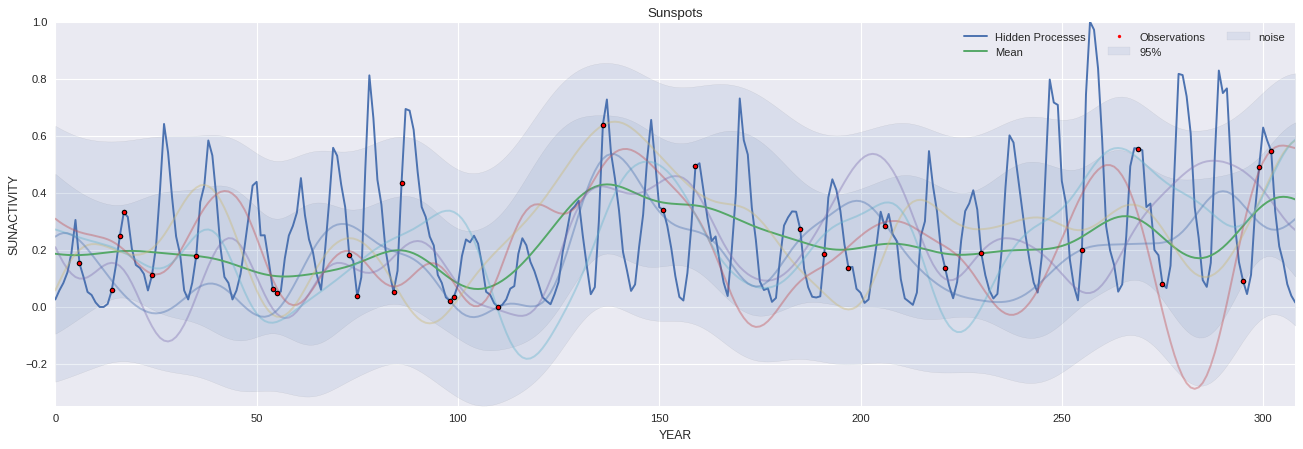

In [36]:
gp.plot(gp.params_widget, samples=5)
g3.plot_save('images/gp_sunspots1.pdf')
gp.params_widget, gp.logp(gp.params_widget), gp.scores(gp.params_widget, logp=False)

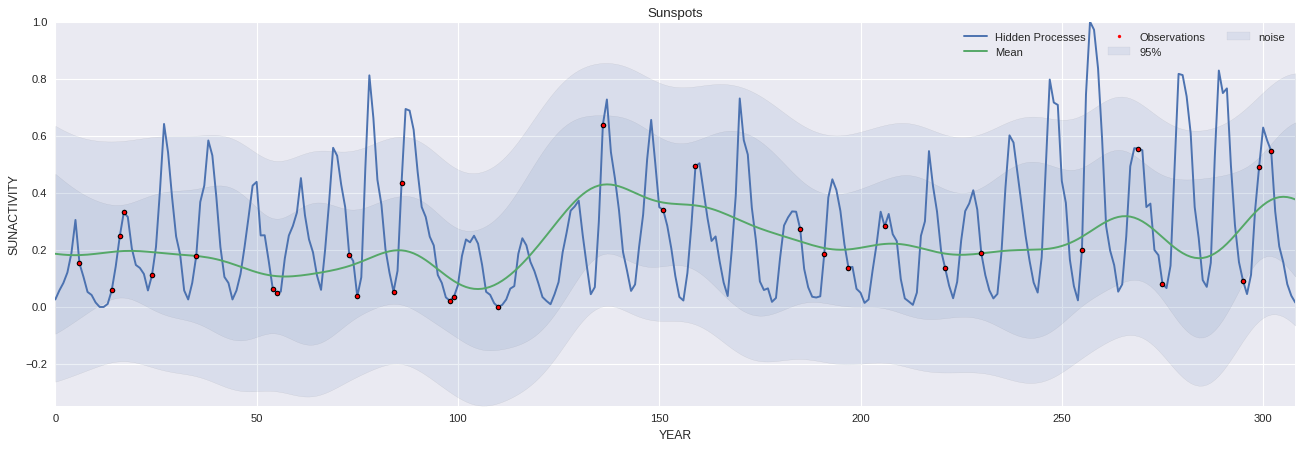

Starting function value (-logp): -6.92546

start_bfgs
         Current function value: -7.019651
         Iterations: 1
         Function evaluations: 73
         Gradient evaluations: 61

start_powell
Optimization terminated successfully.
         Current function value: -12.881521
         Iterations: 6
         Function evaluations: 622

start_bfgs_powell
Optimization terminated successfully.
         Current function value: -12.844785
         Iterations: 7
         Function evaluations: 766

start_powell_bfgs
         Current function value: -12.881521
         Iterations: 0
         Function evaluations: 67
         Gradient evaluations: 55


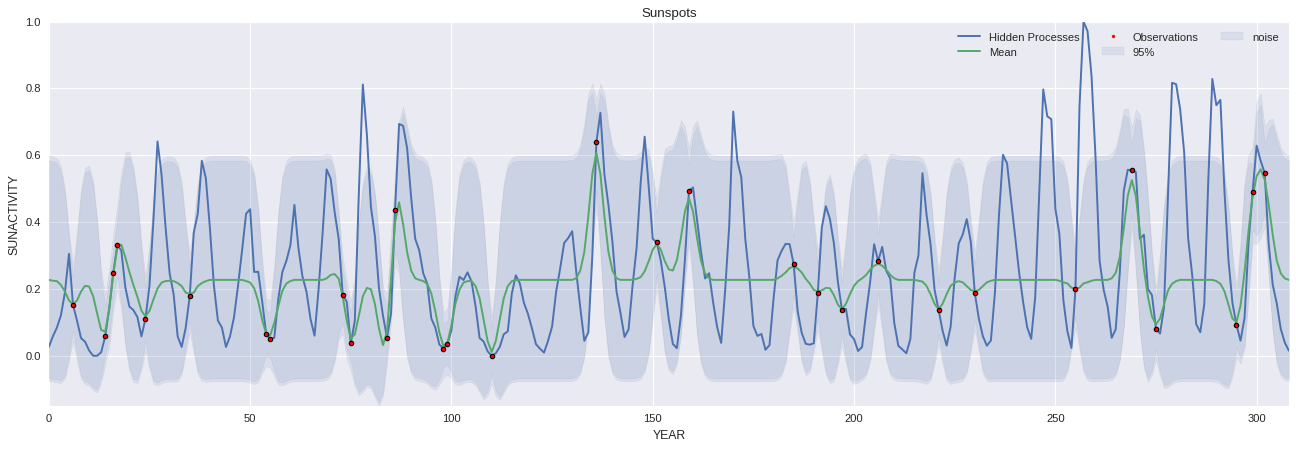

In [37]:
gp.plot(gp.active.params_default)
g3.show()
params_map = gp.find_MAP(gp.active.params_default, points=4)
gp.plot(params_map)

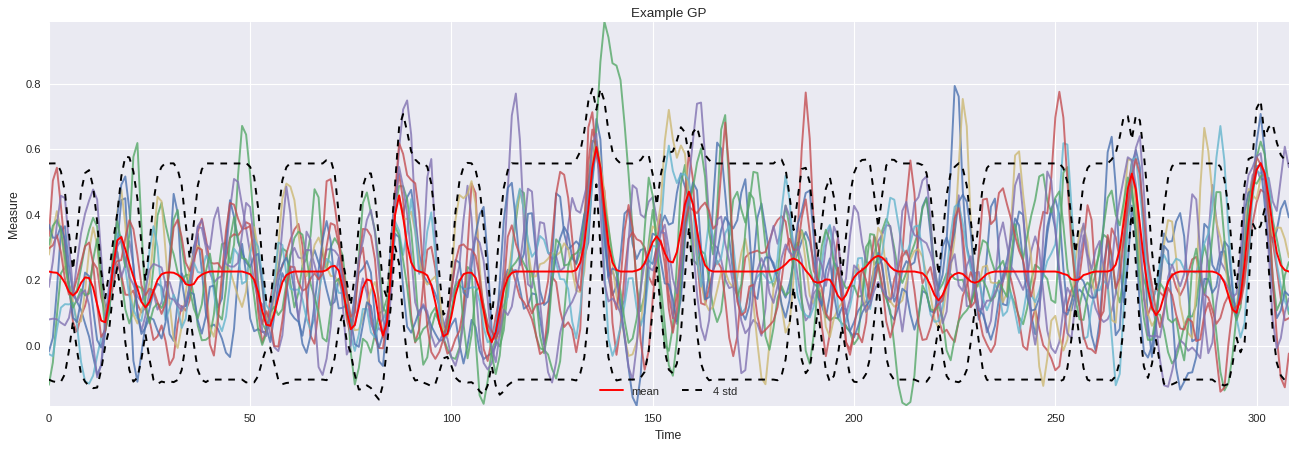

In [38]:
prediction = gp.predict(params_map, samples=10)
mu, std, samples = prediction.mean, prediction.std, prediction.samples
g3.plot(samples, alpha=0.8)
g3.plot(mu, 'r', label='mean')
g3.plot(mu + 2*std, '--k', label='4 std')
g3.plot(mu - 2*std, '--k')
g3.plot_text('Example GP', 'Time', 'Measure')
g3.plot_save('images/gp_sunspots3.pdf')

In [39]:
gp.active.calc_dimensions()
datatrace = gp.sample_hypers(params_map, samples=2000, chains=gp.ndim*2)
datatrace

Sampling 6 variables, 12 chains, 2000 times (None temps)


100%|██████████| 2000/2000 [00:08<00:00, 237.38it/s]


TGP_BoxShift_power_log_  TGP_BoxShift_shift  TGP_Noise_var_log_  \
0                   -10.119682            1.146526           -5.404767   
1                   -10.119682            1.146526           -5.404767   
2                   -10.121500            1.146428           -5.404085   
3                    -9.995876            1.029236           -5.966919   
4                   -10.091198            1.023655           -6.014183   
5                   -10.086815            1.023900           -6.008391   
6                    -9.200660            1.035219           -5.509187   
7                    -9.200660            1.035219           -5.509187   
8                    -9.200660            1.035219           -5.509187   
9                    -8.828944            1.033133           -5.337946   
10                   -9.118883            1.034760           -5.471514   
11                   -8.318616            1.030268           -5.102850   
12                   -8.318616            1.030268           -5.102850   
13                   -8.318616            1.030268           -5.102850   
14                   -8.720471            1.020824           -5.396055   
15                   -8.878092            1.020363           -5.413207   
16                   -6.870899            1.022956           -5.228713   
17                   -6.870899            1.022956           -5.228713   
18                   -6.895033            1.023810           -5.256411   
19                   -6.895033            1.023810           -5.256411   
20                   -6.895033            1.023810           -5.256411   
21                   -4.021257            1.018073           -4.370745   
22                   -4.021257            1.018073           -4.370745   
23                   -7.134288            0.974469           -5.004248   
24                   -7.575558            0.974777           -5.187226   
25                   -7.407520            0.974660           -5.117547   
26                   -5.515561            0.972088           -3.888923   
27                   -5.515561            0.972088           -3.888923   
28                   -5.515561            0.972088           -3.888923   
29                   -5.515561            0.972088           -3.888923   
...                        ...                 ...                 ...   
23970                -5.357966            0.537122          -10.068232   
23971                -5.357966            0.537122          -10.068232   
23972                -5.357966            0.537122          -10.068232   
23973                -5.388122            0.531717           -9.985407   
23974                -4.931319            0.390733           -9.987839   
23975                -4.931319            0.390733           -9.987839   
23976                -5.208061            0.329774          -10.586387   
23977                -5.208061            0.329774          -10.586387   
23978                -4.856464            0.211073          -10.661963   
23979                -5.363657            0.183582           -9.112653   
23980                -5.390606            0.173763           -9.146118   
23981                -5.390606            0.173763           -9.146118   
23982                -5.336171            0.193597           -9.078522   
23983                -5.336171            0.193597           -9.078522   
23984                -5.336171            0.193597           -9.078522   
23985                -5.336171            0.193597           -9.078522   
23986                -5.336171            0.193597           -9.078522   
23987                -5.336171            0.193597           -9.078522   
23988                -5.336171            0.193597           -9.078522   
23989                -5.336171            0.193597           -9.078522   
23990                -5.336171            0.193597           -9.078522   
23991                -5.336171            0.193597           -9.078522   
23992      

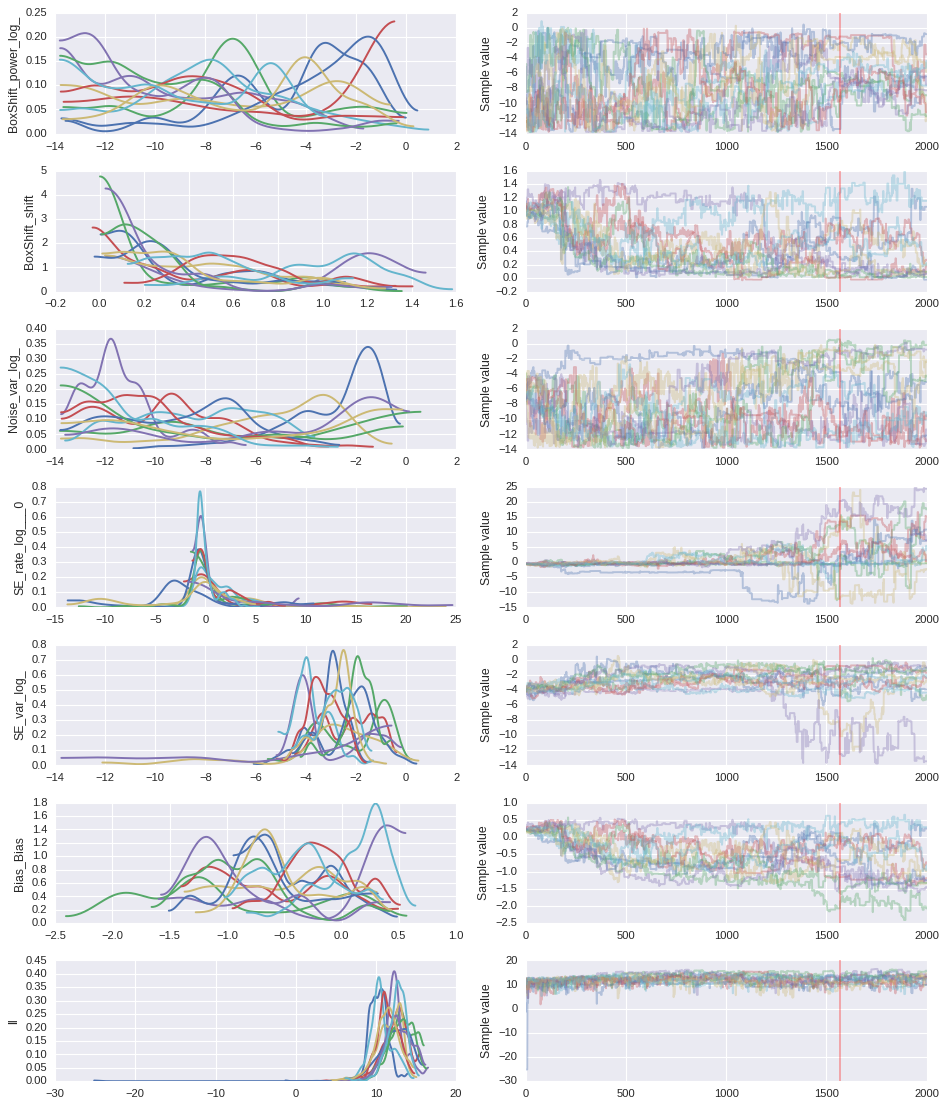

In [40]:
g3.style_seaborn()
g3.plot_datatrace(datatrace)

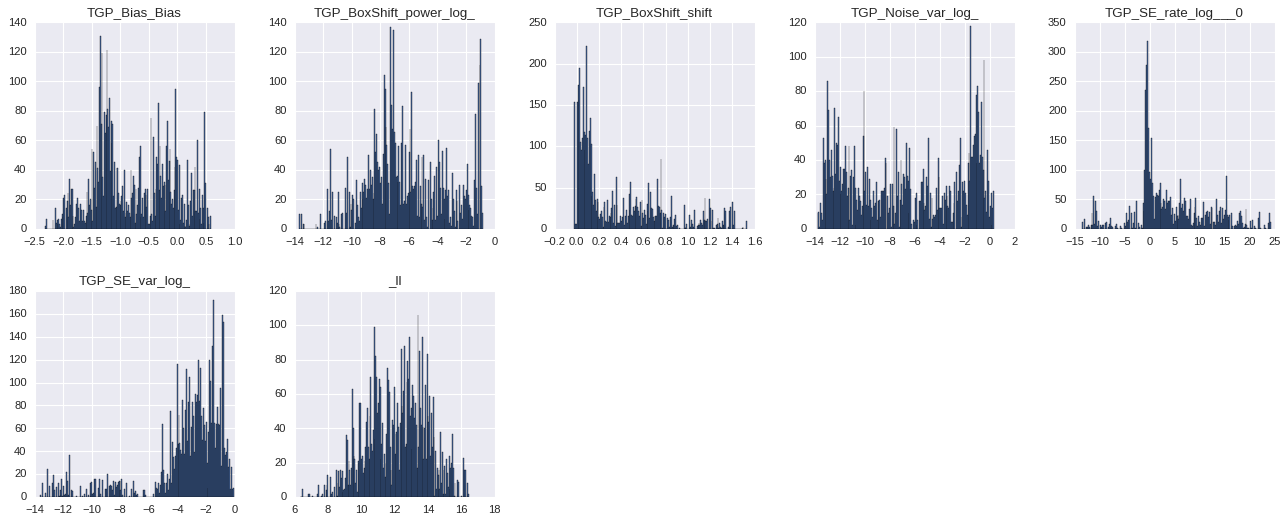

In [41]:
g3.hist_datatrace(datatrace)

In [42]:
g3.cluster_datatrace(gp, datatrace, n_components=5)

<function g3py.bayesian.average.cluster_datatrace.<locals>._cluster>

/grios-sync/Dropbox/Python/GaussianProcesses/G3Py/g3py/bayesian/average.py:382: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  cmap=cmap)


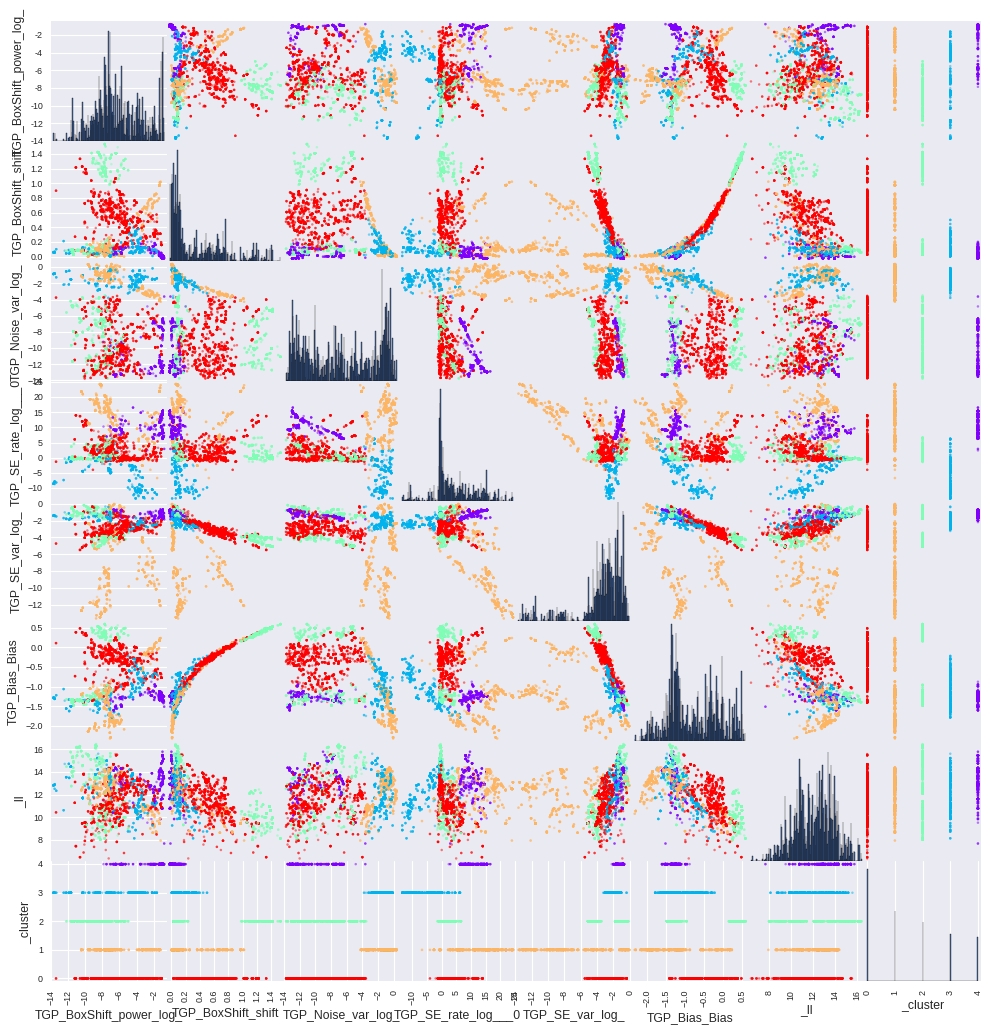

In [43]:
g3.scatter_datatrace(datatrace)

#12000 (50.0 %)


/grios-sync/Dropbox/Python/GaussianProcesses/G3Py/g3py/bayesian/average.py:382: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  cmap=cmap)


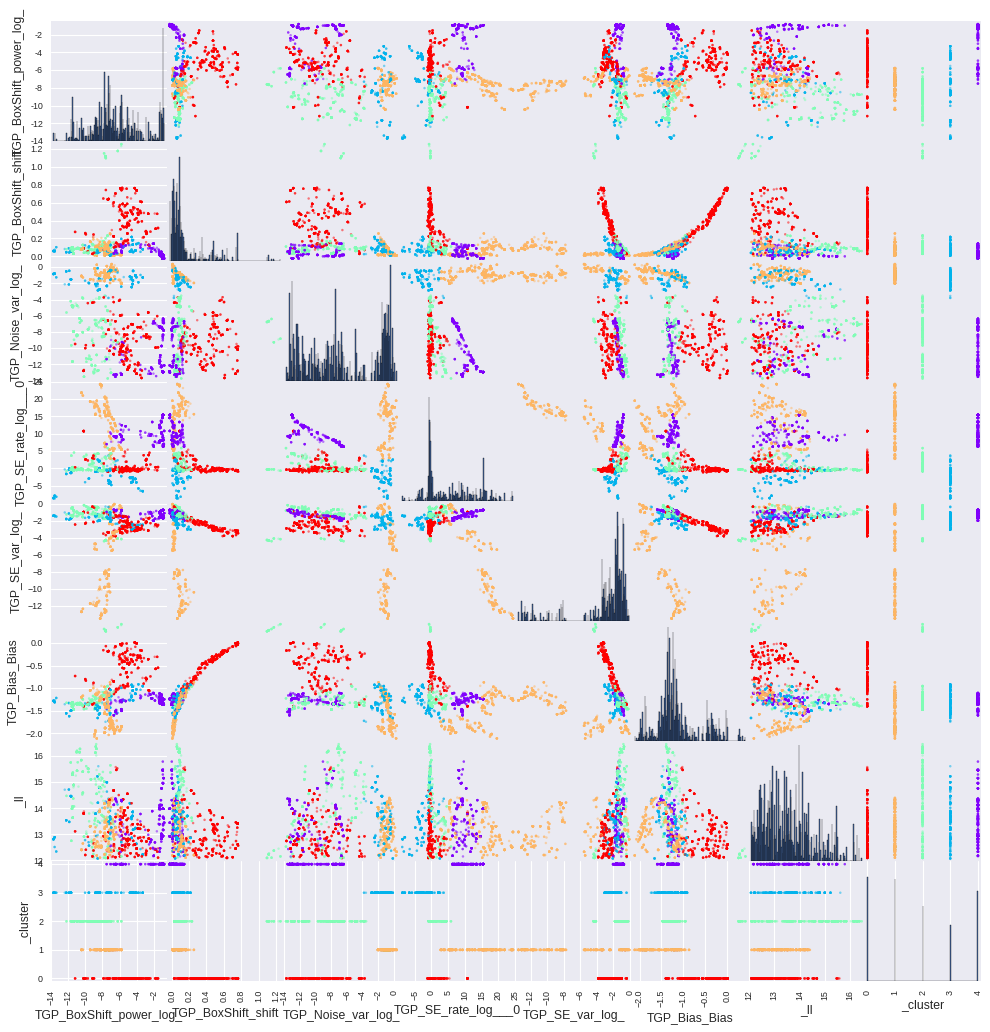

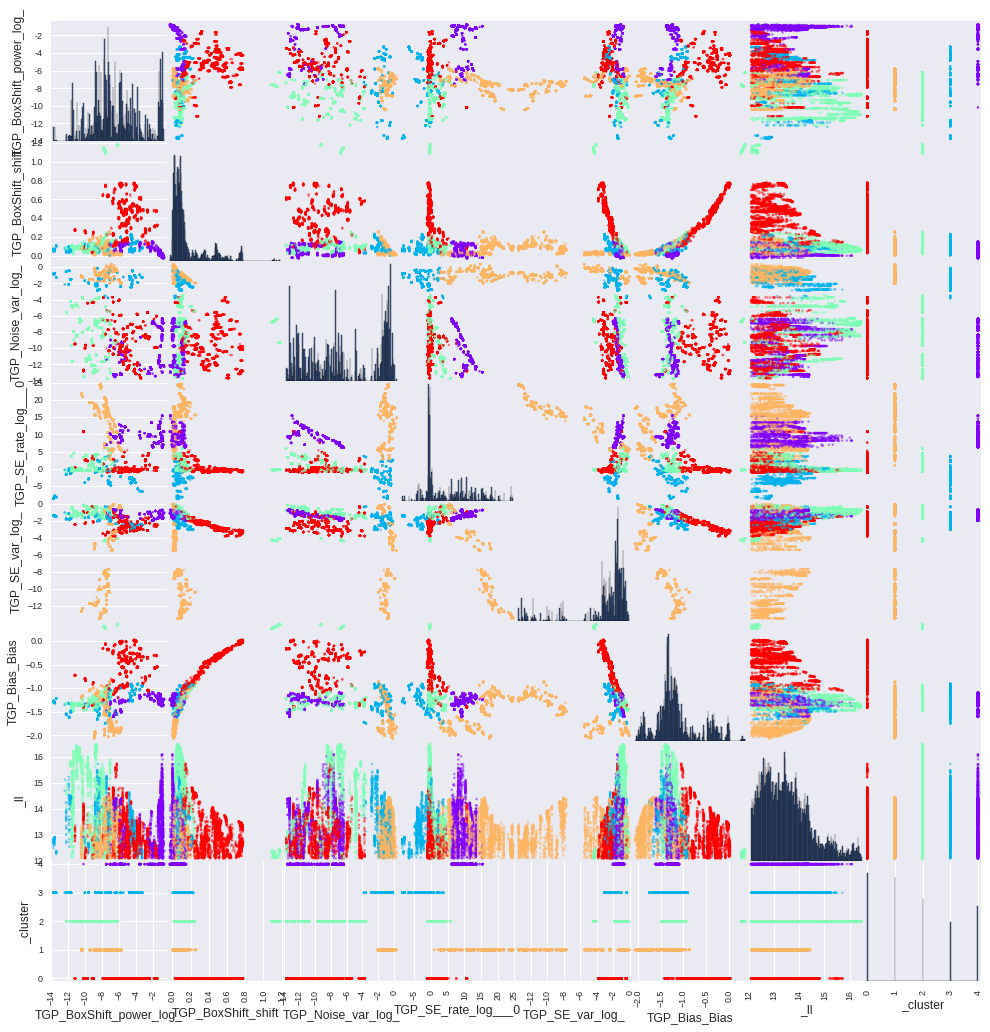

In [44]:
dt_conditional = g3.conditional(datatrace, lambda df: df['_ll'] > datatrace['_ll'].median())
g3.scatter_datatrace(dt_conditional)
kde = g3.datatrace_to_kde(gp, dt_conditional)
g3.scatter_datatrace(g3.kde_to_datatrace(gp, kde, nsamples=len(dt_conditional)))

In [45]:
modes = g3.find_candidates(datatrace, cluster=True)
modes

TGP_BoxShift_power_log_  TGP_BoxShift_shift  TGP_Noise_var_log_  \
ll[7747]                 -8.661133            0.057985           -6.732000   
ll[13771]                -0.988587            0.001102           -9.023217   
ll[18749]               -12.653588            0.060808           -6.083390   
ll[3334]                 -7.492478            0.059226           -3.217884   
ll[3964]                 -6.824701            0.040022           -0.582114   

           TGP_SE_rate_log___0  TGP_SE_var_log_  TGP_Bias_Bias  _nchain  \
ll[7747]             -0.405804        -0.779138      -1.398462        3   
ll[13771]             9.651293        -1.354723      -1.303862        6   
ll[18749]            -0.670757        -0.642898      -1.308585        9   
ll[3334]             -0.536673        -0.899332      -1.312854        1   
ll[3964]              7.721028        -3.937954      -1.608967        1   

           _niter  _burnin  _outlayer        _ll  _cluster  
ll[7747]     1747     True      False  16.505505         2  
ll[13771]    1771     True       True  15.791180         4  
ll[18749]     749    False       True  15.777821         0  
ll[3334]     1334    False       True  15.650297         3  
ll[3964]     1964     True       True  14.411655         1

{'TGP_SE_rate_log_': array([-0.40580395], dtype=float32), 'TGP_BoxShift_shift': array(0.057985156774520874, dtype=float32), 'TGP_Bias_Bias': array(-1.3984620571136475, dtype=float32), 'TGP_BoxShift_power_log_': array(-8.6611328125, dtype=float32), 'TGP_Noise_var_log_': array(-6.732000350952148, dtype=float32), 'TGP_SE_var_log_': array(-0.7791383266448975, dtype=float32)} 16.505504608154297 {'BiasL1': 0.13984583, 'BiasL2': 0.037257388}


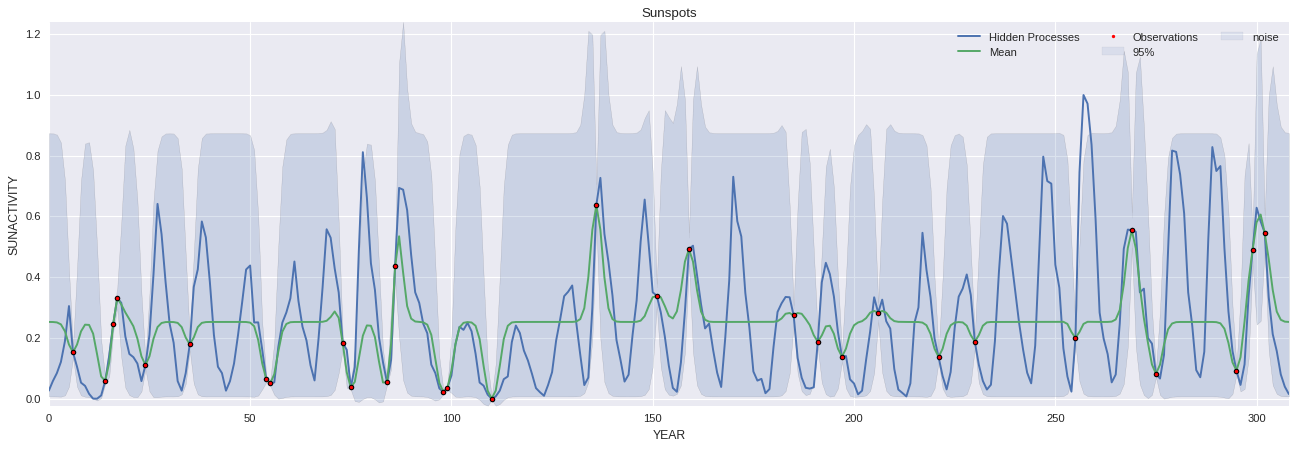

{'TGP_SE_rate_log_': array([ 9.65129375], dtype=float32), 'TGP_BoxShift_shift': array(0.0011024600826203823, dtype=float32), 'TGP_Bias_Bias': array(-1.3038619756698608, dtype=float32), 'TGP_BoxShift_power_log_': array(-0.9885874390602112, dtype=float32), 'TGP_Noise_var_log_': array(-9.02321720123291, dtype=float32), 'TGP_SE_var_log_': array(-1.3547228574752808, dtype=float32)} 15.791179656982422 {'BiasL1': 0.15263511, 'BiasL2': 0.043914668}


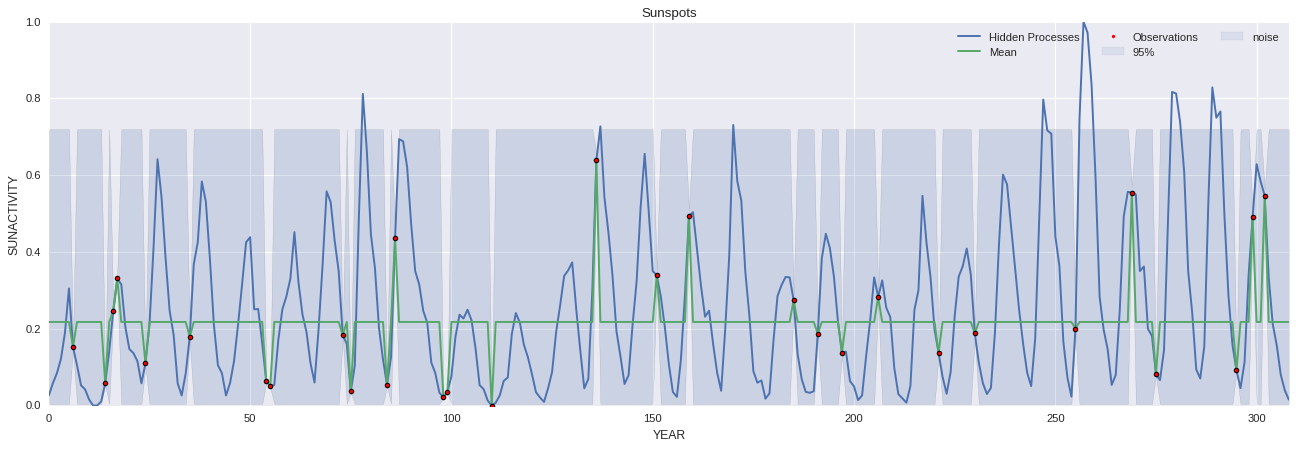

{'TGP_SE_rate_log_': array([-0.67075741], dtype=float32), 'TGP_BoxShift_shift': array(0.06080828607082367, dtype=float32), 'TGP_Bias_Bias': array(-1.3085845708847046, dtype=float32), 'TGP_BoxShift_power_log_': array(-12.65358829498291, dtype=float32), 'TGP_Noise_var_log_': array(-6.083389759063721, dtype=float32), 'TGP_SE_var_log_': array(-0.6428978443145752, dtype=float32)} 15.777820587158203 {'BiasL1': 0.14305708, 'BiasL2': 0.038162597}


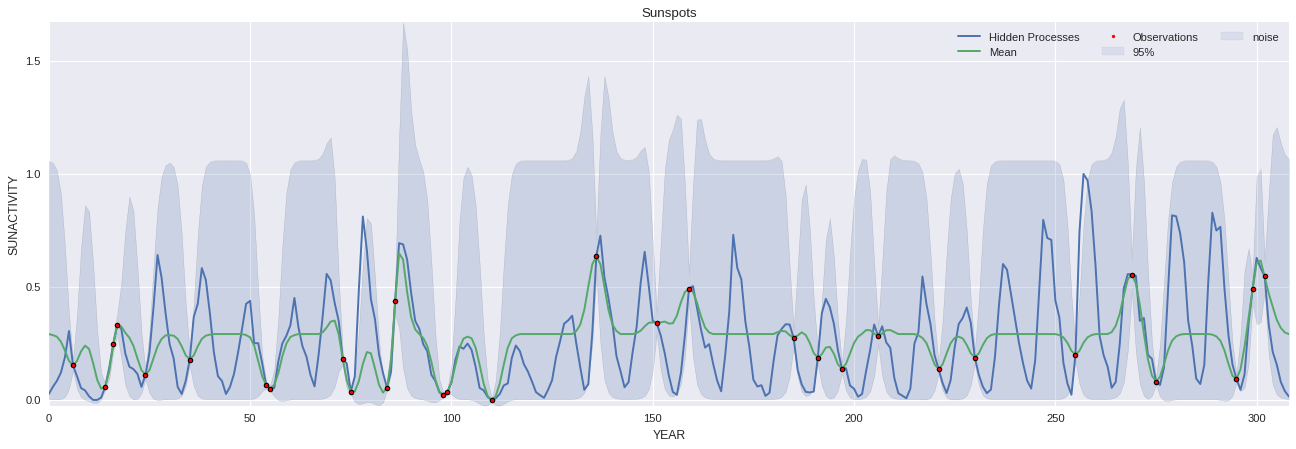

{'TGP_SE_rate_log_': array([-0.53667265], dtype=float32), 'TGP_BoxShift_shift': array(0.05922558903694153, dtype=float32), 'TGP_Bias_Bias': array(-1.3128539323806763, dtype=float32), 'TGP_BoxShift_power_log_': array(-7.492478370666504, dtype=float32), 'TGP_Noise_var_log_': array(-3.217883825302124, dtype=float32), 'TGP_SE_var_log_': array(-0.8993316292762756, dtype=float32)} 15.650297164916992 {'BiasL1': 0.14311726, 'BiasL2': 0.03727527}


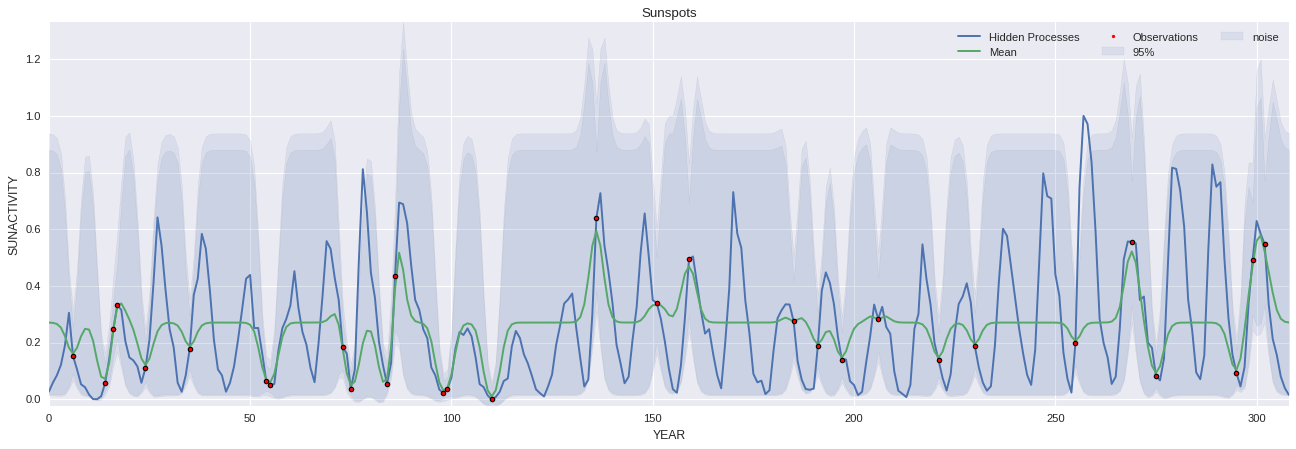

{'TGP_SE_rate_log_': array([ 7.72102833], dtype=float32), 'TGP_BoxShift_shift': array(0.04002175107598305, dtype=float32), 'TGP_Bias_Bias': array(-1.6089667081832886, dtype=float32), 'TGP_BoxShift_power_log_': array(-6.824700832366943, dtype=float32), 'TGP_Noise_var_log_': array(-0.5821136236190796, dtype=float32), 'TGP_SE_var_log_': array(-3.9379539489746094, dtype=float32)} 14.41165542602539 {'BiasL1': 0.17131415, 'BiasL2': 0.054890987}


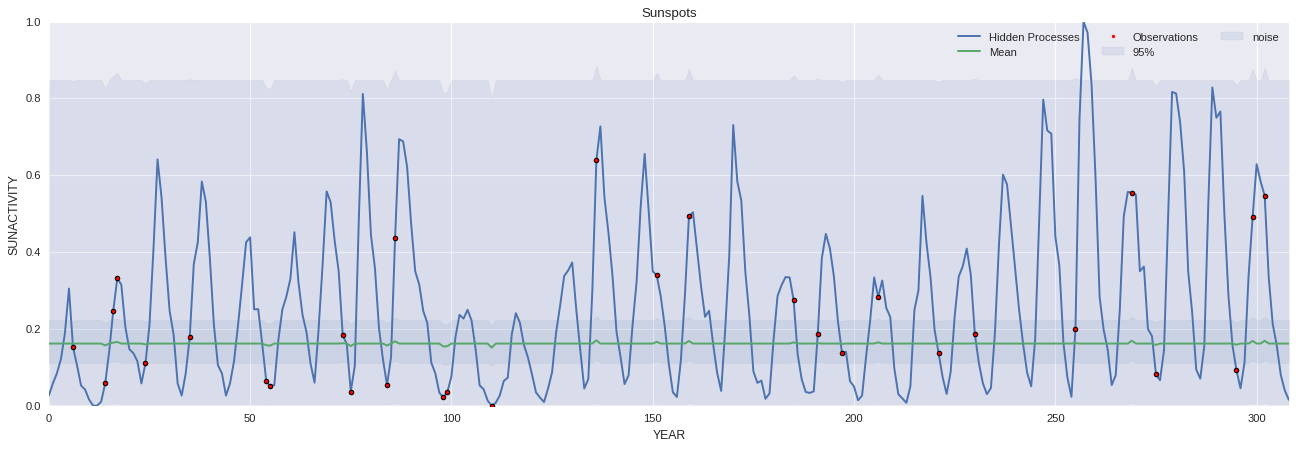

In [46]:
for k in modes.T:
    params = gp.active.params_datatrace(modes, k)
    print(params, gp.logp(params), gp.scores(params, logp=False))
    gp.plot(params)
    g3.show()

In [31]:
#TODO: predict(chain)

In [32]:
#TODO: mean BlackBox

In [ ]:
return

In [ ]:
gp.plot_model(params)

# Gaussian Random Fields

In [ ]:
g3.style_seaborn()

name_data = 'abalone'
names=['Sex','Length', 'Diam', 'Height', 'Whole', 'Shucked', 'Viscera','Shell','Rings']
abalone = pd.read_csv('data/abalone.csv', names=names)
#abalone['Sex'] = (abalone['Sex'] == 'M')*-1.0 + (abalone['Sex'] == 'F')*1.0 + 0.0
abalone = abalone.drop('Sex', axis=1) # Drop categoric variable
x = abalone.drop('Rings', axis=1).values.astype(dtype=np.float32)
y = abalone['Rings'].values.astype(dtype=np.float32)
p_obs = 0.3*0.2395
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, p_obs)

In [ ]:
gp = g3.GaussianProcess(x.shape[1], g3.Bias(), g3.SE(x_obs), hidden=y, file='models/01-'+name_data+'_GP.g3')
gp.describe(name_data+' GP','time','measure','GP')
gp.observed(x_obs, y_obs, obs_j)
gp.set_space(x, y)
gp.plot(plot_space=True)

In [ ]:
params = gp.find_MAP(points=4)
gp.set_params(params)

In [ ]:
print('Test:   ', gp.scores(gp.get_params_test()))
print('Default:', gp.scores(gp.get_params_default()))
print('Current:', gp.scores(gp.get_params_current()))
gp.plot()